In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load datasets
df_purchase = pd.read_csv("purchase_details.csv")
df_user = pd.read_csv("user_demographics.csv")

In [3]:
# Merge on User_ID
df = pd.merge(df_purchase, df_user, on="User_ID", how="left")

In [4]:
# Create binary target
df["High_Value_Purchase"] = (df["Purchase"] >= 10000).astype(int)

In [5]:
# Drop unnecessary columns
df = df.drop(["Product_ID"], axis=1)

In [6]:
# Handle missing values
df = df.fillna(0)

In [7]:
# Encode categorical variables
df = pd.get_dummies(df, columns=["Gender", "Age", "City_Category", "Stay_In_Current_City_Years"], drop_first=True)

In [8]:
# Features and target
X = df.drop(["High_Value_Purchase", "Purchase"], axis=1)
y = df["High_Value_Purchase"]

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [12]:
# Train Logistic Regression
log = LogisticRegression(max_iter=2000)
log.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [13]:
# Predictions
pred_lr = log.predict(X_test_scaled)

In [14]:
# Evaluation
print("LR Accuracy:", accuracy_score(y_test, pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_lr))

LR Accuracy: 0.7660115985238243
Confusion Matrix:
 [[64692  7414]
 [18328 19580]]


In [15]:
from tensorflow.keras import models, layers

In [16]:
# Build MLP
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')   # Binary classification
])

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compile
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [18]:
# Train
history = model.fit(X_train_scaled, y_train, epochs=15, batch_size=32, validation_split=0.2, verbose=1)



Epoch 1/15
11002/11002 ━━━━━━━━━━━━━━━━━━━━ 10s 857us/step - accuracy: 0.8322 - loss: 0.3883 - val_accuracy: 0.8647 - val_loss: 0.3123
Epoch 2/15
11002/11002 ━━━━━━━━━━━━━━━━━━━━ 10s 924us/step - accuracy: 0.8772 - loss: 0.2986 - val_accuracy: 0.8708 - val_loss: 0.2946
Epoch 3/15
11002/11002 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8853 - loss: 0.2821 - val_accuracy: 0.8884 - val_loss: 0.2714
Epoch 4/15
11002/11002 ━━━━━━━━━━━━━━━━━━━━ 10s 900us/step - accuracy: 0.8903 - loss: 0.2731 - val_accuracy: 0.8901 - val_loss: 0.2680
Epoch 5/15
11002/11002 ━━━━━━━━━━━━━━━━━━━━ 10s 916us/step - accuracy: 0.8939 - loss: 0.2663 - val_accuracy: 0.8946 - val_loss: 0.2631
Epoch 6/15
11002/11002 ━━━━━━━━━━━━━━━━━━━━ 10s 870us/step - accuracy: 0.8947 - loss: 0.2626 - val_accuracy: 0.8959 - val_loss: 0.2608
Epoch 7/15
11002/11002 ━━━━━━━━━━━━━━━━━━━━ 9s 805us/step - accuracy: 0.8955 - loss: 0.2601 - val_accuracy: 0.8971 - val_loss: 0.2584
Epoch 8/15
11002/11002 ━━━━━━━━━━━━━━━━━━━━ 10s 896us/step

In [19]:
# Evaluate
loss, acc = model.evaluate(X_test_scaled, y_test)
print("MLP Accuracy:", acc)

3438/3438 ━━━━━━━━━━━━━━━━━━━━ 2s 685us/step - accuracy: 0.8977 - loss: 0.2526
MLP Accuracy: 0.8977311849594116


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Logistic Regression results
pred_lr = log.predict(X_test_scaled)
acc_lr = accuracy_score(y_test, pred_lr)
cm_lr = confusion_matrix(y_test, pred_lr)

# MLP results
loss, acc_mlp = model.evaluate(X_test_scaled, y_test, verbose=0)
pred_mlp = (model.predict(X_test_scaled) > 0.5).astype("int32")
cm_mlp = confusion_matrix(y_test, pred_mlp)

# Print accuracies together
print(f"Logistic Regression Accuracy: {acc_lr:.4f}")
print(f"MLP Accuracy: {acc_mlp:.4f}")


3438/3438 ━━━━━━━━━━━━━━━━━━━━ 2s 436us/step
Logistic Regression Accuracy: 0.7660
MLP Accuracy: 0.8977


In [22]:
from sklearn.metrics import precision_score

# Logistic Regression precision
pred_lr = log.predict(X_test_scaled)
precision_lr = precision_score(y_test, pred_lr)

# MLP precision
pred_mlp = (model.predict(X_test_scaled) > 0.5).astype("int32")
precision_mlp = precision_score(y_test, pred_mlp)

# Print both precisions
print(f"Logistic Regression Precision: {precision_lr:.4f}")
print(f"MLP Precision: {precision_mlp:.4f}")

3438/3438 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step
Logistic Regression Precision: 0.7253
MLP Precision: 0.7916


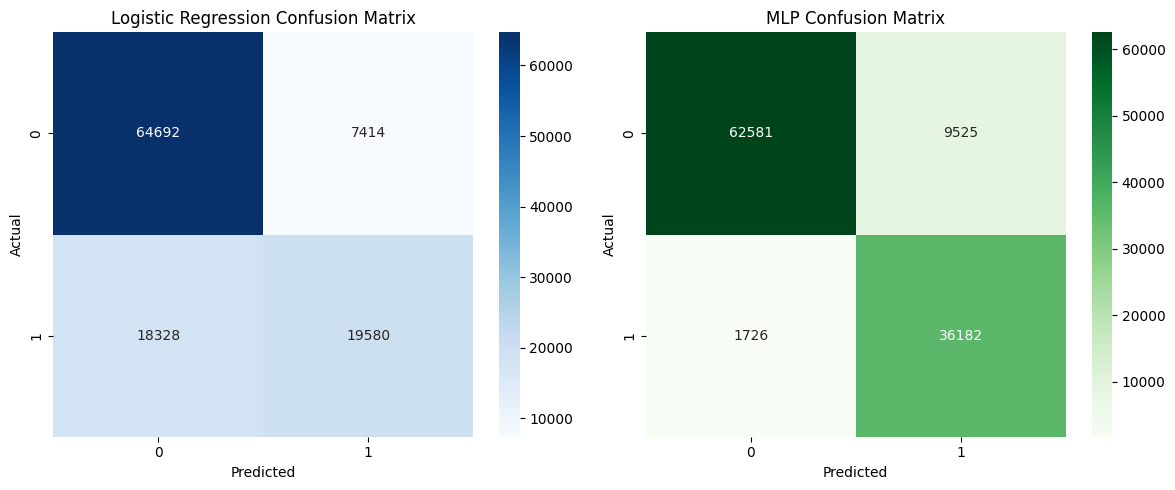

In [21]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("MLP Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()